In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("resources/output.csv", index_col="Year")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885548 entries, 2015 to 2009
Data columns (total 4 columns):
Month     885548 non-null object
State     885548 non-null object
County    885548 non-null object
Rate      885548 non-null float64
dtypes: float64(1), object(3)
memory usage: 33.8+ MB


In [9]:
data.head()

,Month,State,County,Rate
Year,,,,
2015,February,Mississippi,Newton County,6.1
2015,February,Mississippi,Panola County,9.4
2015,February,Mississippi,Monroe County,7.9
2015,February,Mississippi,Hinds County,6.1
2015,February,Mississippi,Kemper County,10.6


In [17]:
state_to_code = {'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}

In [18]:
data["state abv"] = data["State"].apply(lambda x: state_to_code[x])

In [20]:
data["state abv"]

Year
2015    MS
2015    MS
2015    MS
2015    MS
2015    MS
        ..
2009    ME
2009    ME
2009    ME
2009    ME
2009    ME
Name: state abv, Length: 885548, dtype: object

### Visualizations

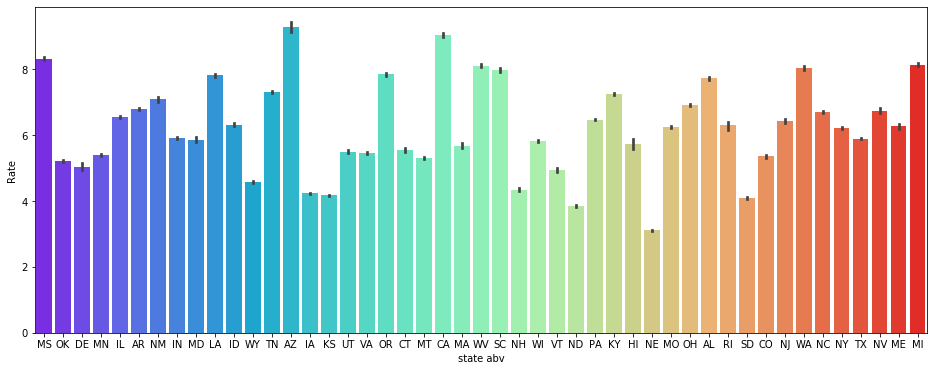

In [43]:
plt.figure(figsize=(16,6))
sns.barplot(x = "state abv", y = "Rate", data=data, palette="rainbow")

In [37]:
by_State = data.groupby("state abv").mean().sort_values("Rate", ascending = False)

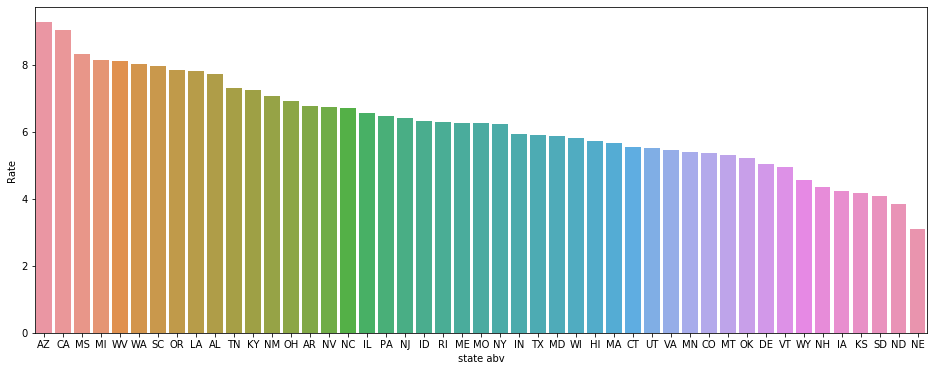

In [39]:
plt.figure(figsize=(16,6))
sns.barplot(x = by_State.index, y = "Rate", data=by_State)

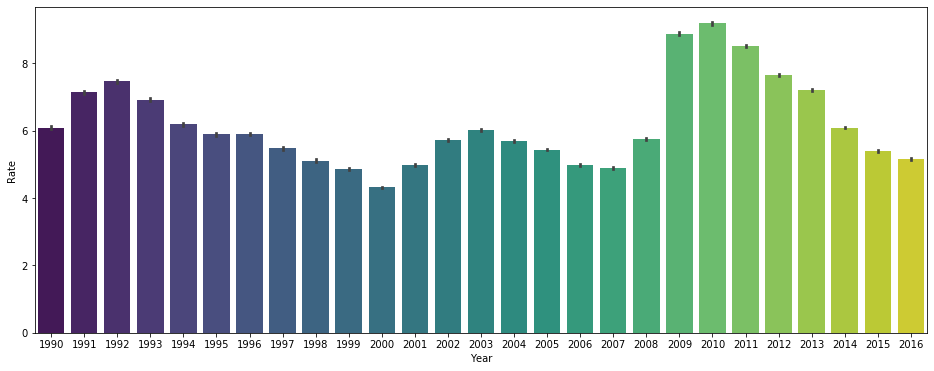

In [42]:
plt.figure(figsize=(16,6))
sns.barplot(x = data.index, y = "Rate", data=data, palette="viridis")

In [72]:
tickers = ["ANGL", "BSJO", "EMHY", "FALN"]

In [73]:
from pandas_datareader import data as web

In [74]:
bond = pd.DataFrame()

In [75]:
for t in tickers:
    bond[t]  = web.DataReader(t, data_source="yahoo", start="2017-01-01")["Adj Close"]

In [77]:
bond.corr()

,ANGL,BSJO,EMHY,FALN
ANGL,1.000000,0.979039,0.844716,0.993588
BSJO,0.979039,1.000000,0.829104,0.977398
EMHY,0.844716,0.829104,1.000000,0.856545
FALN,0.993588,0.977398,0.856545,1.000000
